# Ordenamiento

El ordenamiento de arreglos corresponde a encontrar una permutación tal que cada elemento sea menor a su sucesor. 

In [1]:
def selection_sort(collection):
    length = len(collection)
    for i in range(length):
        least = i
        for k in range(i + 1, length):
            if collection[k] < collection[least]:
                least = k
        collection[least], collection[i] = (collection[i], collection[least])
    return collection

def insertion_sort(collection):
    for index in range(1, len(collection)):
        while 0 < index and collection[index] < collection[index - 1]:
            collection[index], collection[index - 1] = collection[index - 1], collection[index]
            index -= 1
    return collection

In [2]:
insertion_sort([3,2,1])

[1, 2, 3]

In [3]:
import numpy as np
import time

def gen_random(size):
    return np.random.permutation(np.arange(size,dtype=np.int8))

def gen_worst_case(size):
    return np.arange(size,-1,-1,dtype=np.int8)

def gen_best_case(size):
    return np.arange(size,dtype=np.int8)

arr=gen_best_case(1000)

start=time.clock()
insertion_sort(arr.copy())
end=time.clock()
t1=end-start

start=time.clock()
selection_sort(arr.copy())
end=time.clock()
t2=end-start



print('Insertion Sort: %2f'%t1)
print('Selection Sort : %2f'%t2)


Insertion Sort: 0.171106
Selection Sort : 0.132312


In [4]:
def merge_sort(A):
    n=len(A)
    if len(A) <= 1:
      return A
    L = merge_sort(A[0:int(n/2)])
    R = merge_sort(A[int(n/2):n])
    return merge(L, R)

def merge(L, R):
    result = []
    l_idx, r_idx = (0, 0)
    while l_idx < len(L) and r_idx < len(R):
      if L[l_idx] < R[r_idx]:
        result.append(L[l_idx])
        l_idx += 1
      else:
        result.append(R[r_idx])
        r_idx += 1
    result.extend(L[l_idx:len(L)])
    result.extend(R[r_idx:len(R)])
    return result

In [5]:
arr=gen_best_case(10)

print(arr[0:int(10/2)])
print(arr[int(10/2):10])
#sorted_arr=merge_sort(arr)

#print(sorted_arr)

[0 1 2 3 4]
[5 6 7 8 9]


In [6]:
import pandas as pd
import time 
import sys

method=[merge_sort,selection_sort,insertion_sort]
fun=[gen_random,gen_worst_case,gen_best_case]
n_data=[1000,2000,3000,4000,5000,10000]
n_samp=100

s_n=[]
ellapsed_time={m.__name__:[] for m in method}

for i in n_data:
    for j in range(n_samp):
        s_n.append(i)
        arr=gen_random(i)
        for m in method:
            start=time.clock()
            m(arr.copy())
            end=time.clock()
            ellapsed_time[m.__name__].append(end-start)
        

In [7]:
df_list=[]
for m in method:
    df=pd.DataFrame({'n':s_n,'time':ellapsed_time[m.__name__],'method':[m.__name__]*len(ellapsed_time[m.__name__])})
    df_list.append(df)
df=pd.concat(df_list,axis=0)
df.head()

,n,time,method
0,1000,0.004114,merge_sort
1,1000,0.004040,merge_sort
2,1000,0.004284,merge_sort
3,1000,0.004762,merge_sort
4,1000,0.004211,merge_sort


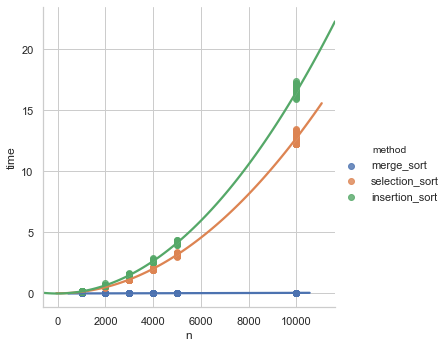

In [9]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.lmplot(x="n", y="time", hue="method",order=2, data=df)
plt.show()

In [10]:
df.groupby(['method','n']).mean()


time
method         n               
insertion_sort 1000    0.168169
               2000    0.670310
               3000    1.497319
               4000    2.659006
               5000    4.139591
               10000  16.502413
merge_sort     1000    0.004325
               2000    0.008784
               3000    0.013688
               4000    0.018394
               5000    0.023720
               10000   0.050048
selection_sort 1000    0.131304
               2000    0.514303
               3000    1.153207
               4000    2.031487
               5000    3.161573
               10000  12.719859

In [11]:
df.groupby(['method','n']).var()

time
method         n                  
insertion_sort 1000   7.444836e-05
               2000   4.695922e-04
               3000   1.342906e-03
               4000   2.628049e-03
               5000   5.086379e-03
               10000  8.546003e-02
merge_sort     1000   4.500000e-07
               2000   3.279535e-08
               3000   1.665562e-08
               4000   1.662629e-08
               5000   2.604358e-07
               10000  9.277982e-07
selection_sort 1000   1.033062e-04
               2000   1.724871e-04
               3000   3.012745e-03
               4000   2.283813e-03
               5000   4.242298e-03
               10000  8.091400e-02

In [12]:
import numpy as np
import statsmodels.formula.api as sm

def get_model(data, quadratic=True):
    if quadratic:
        data['n_squared'] = data.n**2
        model = sm.ols('time ~ n_squared', data=data).fit()
    else: # assume n log(n)
        data['nlogn'] = data.n * np.log(data.n)
        model = sm.ols('time ~ nlogn', data=data).fit()
    return model


In [13]:
model1=get_model(df[df.method=='selection_sort'],True)
model2=get_model(df[df.method=='selection_sort'],False)

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.470e+05
Date:                Thu, 29 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:56:15   Log-Likelihood:                 407.63
No. Observations:                 600   AIC:                            -811.3
Df Residuals:                     598   BIC:                            -802.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.006      0.077      0.939      -0.012       0.013
n_squared   1.272e-07   1.47e-10    864.299      0.000    1.27e-07    1.27e-07
==============================================================================
Omnibus:                      125.815   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2469.848
Skew:                           0.311   Prob(JB):                         0.00
Kurtosis:                      12.920   Cond. No.                     5.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.378e+04
Date:                Thu, 29 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:56:20   Log-Likelihood:                -777.73
No. Observations:                 600   AIC:                             1559.
Df Residuals:                     598   BIC:                             1568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1715      0.059    -36.868      0.000      -2.287      -2.056
nlogn          0.0002    1.3e-06    117.386      0.000       0.000       0.000
==============================================================================
Omnibus:                     7847.215   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.667
Skew:                           0.073   Prob(JB):                     6.03e-12
Kurtosis:                       1.570   Cond. No.                     7.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""